In [1]:
import pandas as pd
import numpy as np

seed = 1234

In [2]:
df = pd.read_csv('MSCallGraph_joined_io.csv')
df = df.drop(['traceid'],axis=1)
df = df.drop_duplicates()

In [3]:
df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc_out,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined_out,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
3,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_in,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
4,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
...,...,...,...
222400013,24601dd8b36f856eb0a4d759866f475bc62cf843ffe092...,rpc_in,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...
222400014,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...,db_out,1ac258b5230c8d9dfb28dcad1ced301a9b475b58b37025...
222447693,cc89071de722ad78455c531ebeefab3380ed933ffcd0c8...,rpc_in,159eafe7e8d59656f3f1b913cca6b8fb0127e62a7019f5...
222467609,5d887bdb9fd24cea365fb7ce018526df1d39b11630081b...,db_out,8ee7c139f721a23915ca012d2518eddbdc7ad1ced8b3da...


In [4]:
triplets = []
entities = set()
relations = set()
for i in range(len(df)):
    head = df.iloc[i]['dm']
    tail = df.iloc[i]['um']
    rel = df.iloc[i]['rpctype']
    entities.add(head)
    entities.add(tail)
    relations.add(rel)
    triplets.append([head,rel,tail])

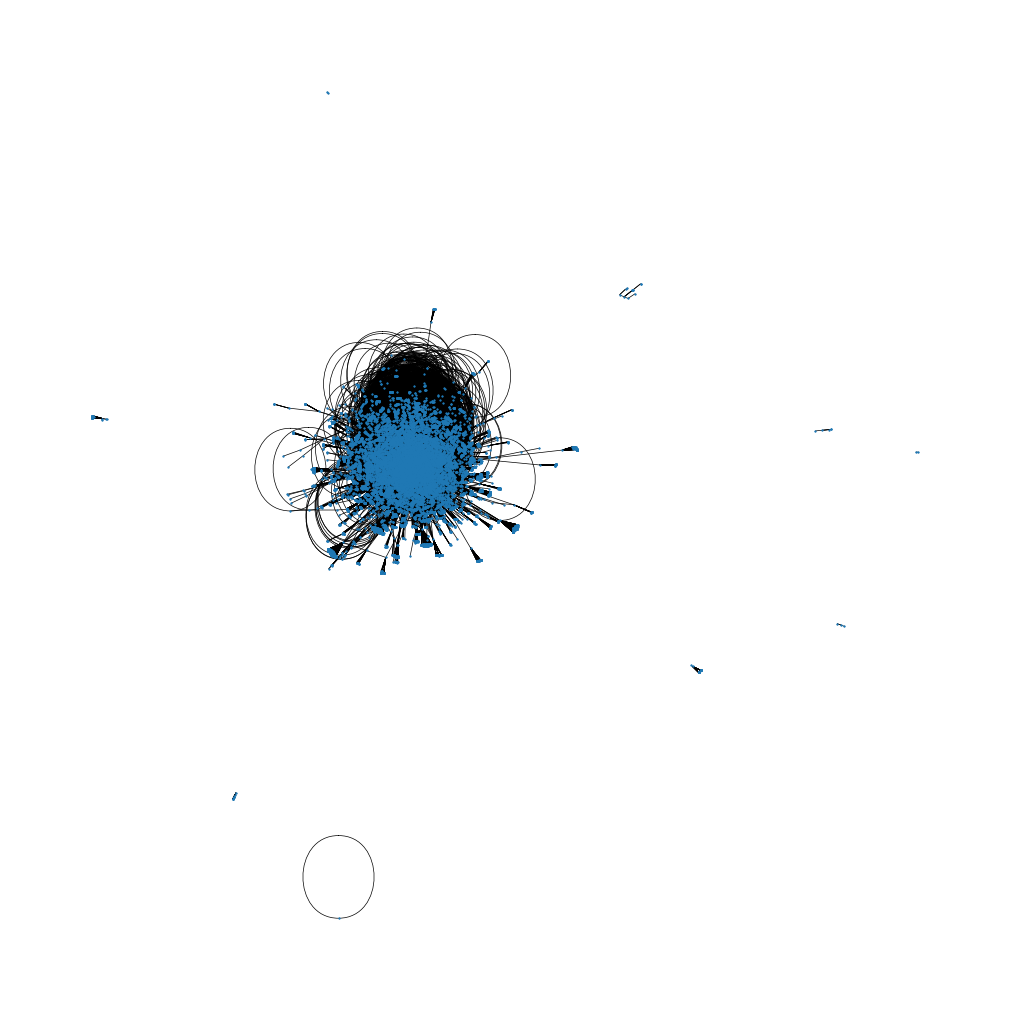

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

for entity in entities:
    G.add_node(entity)
for triplet in triplets:
    G.add_edge(triplet[0], triplet[2], label=triplet[1])

fig = plt.figure(1, figsize=(20, 20), dpi=50)

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [6]:
import random


# shuffle the nodes randomly
nodes = list(G.nodes())
random.shuffle(nodes)

# split the nodes into two sets of approximately 64% and 36%
n = len(nodes)
m = int(n * 0.64)
nodes1 = set(nodes[:m])
nodes2 = set(nodes[m:])

# create subgraphs from the two sets of nodes
G1 = G.subgraph(nodes1)
G2 = G.subgraph(nodes2)

# print the sizes of the subgraphs
print(len(G1), len(G2))

10524 5920


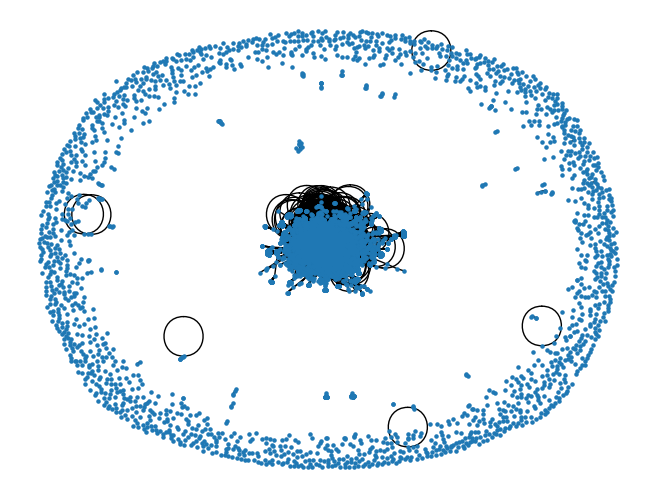

In [7]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G1, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

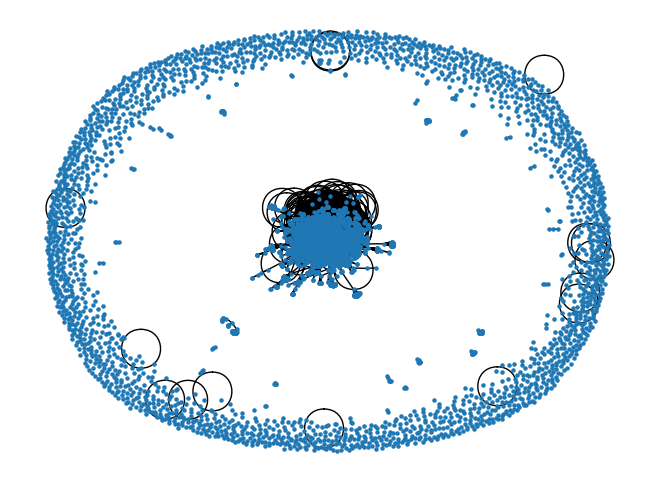

In [8]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G2, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [9]:
len(list(G1.edges(data=True)))

22574

In [10]:
len(list(G2.edges(data=True)))

6440

In [11]:
entities = list(set(df['dm']) | set(df['um']))
len(entities)

16444

In [12]:
relations = set(df['rpctype'])
len(relations)

8

In [13]:
G1_list = list(G1.nodes())
G2_list = list(G2.nodes())

Check that there are no overlapping nodes

In [14]:
assert len(set(G1_list) & set(G2_list)) == 0

In [15]:
transductive = df[(df['um'].isin(G1_list)) & (df['dm'].isin(G1_list))]
transductive

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc_out,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined_out,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
4,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
5,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,676ca482c56de84046ce1d0076abd6cdb0f25778d036db...
...,...,...,...
222165677,0e196e772ff517533a7396537ab970729fbbc9ae2f5685...,db_out,1ad48819784a5260b68aa43b7753404d65e34369cbc1f3...
222165682,0e196e772ff517533a7396537ab970729fbbc9ae2f5685...,db_out,dfc72b449a65283e6038992b83a9fd2aef4a62444f1250...
222184474,8c668296f4ee5134867e07e2196acd9e2f76181bc6983a...,db_out,1ef3e9820a0cd97ef806a682fa6484d44758aaa46290ba...
222184480,65da4ff51280b56e8ce1c60bf1ccbb855727d731f421f4...,mc_out,db26cc26fdae0d5456cff568d5721bc86eb0531ed3c850...


In [16]:
inductive = df[(df['um'].isin(G2_list)) & (df['dm'].isin(G2_list))]
inductive

,um,rpctype,dm
9,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_in,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
10,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined_out,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
11,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_out,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
23,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,mc_out,6655de1e1f8b90d9f49e942d595b112742780854f994bc...
24,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_out,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
...,...,...,...
218791907,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...,rpc_out,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...
220344767,0dfe233014429c0624f889e6efd1c0f9e232363c2be114...,rpc_out,3a0f96dcfd3152e21538cb4a877dc81680f8a0b7c73355...
220414140,94dce029795f9357501c763b763bf951c8290ad1744ec1...,db_out,1a1e60a03306a756389c646a3f7a7b53327b826a0d5718...
221372375,19612380d038043e051cf922650c420311bc292cdc32c5...,db_out,d1ac51fa17e65538b7c4fcf87d1cbb6ad0be483ecb5c85...


Check that the remaining values are correct

In [17]:
assert len(transductive) == len(pd.merge(transductive,df))

In [18]:
assert len(inductive) == len(pd.merge(inductive,df))

In [19]:
train_df = transductive
train_df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc_out,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined_out,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
4,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
5,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc_out,676ca482c56de84046ce1d0076abd6cdb0f25778d036db...
...,...,...,...
222165677,0e196e772ff517533a7396537ab970729fbbc9ae2f5685...,db_out,1ad48819784a5260b68aa43b7753404d65e34369cbc1f3...
222165682,0e196e772ff517533a7396537ab970729fbbc9ae2f5685...,db_out,dfc72b449a65283e6038992b83a9fd2aef4a62444f1250...
222184474,8c668296f4ee5134867e07e2196acd9e2f76181bc6983a...,db_out,1ef3e9820a0cd97ef806a682fa6484d44758aaa46290ba...
222184480,65da4ff51280b56e8ce1c60bf1ccbb855727d731f421f4...,mc_out,db26cc26fdae0d5456cff568d5721bc86eb0531ed3c850...


In [20]:
len(set(inductive['dm']) | set(inductive['um']))

3587

In [21]:
inductive

,um,rpctype,dm
9,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_in,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
10,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined_out,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
11,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_out,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
23,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,mc_out,6655de1e1f8b90d9f49e942d595b112742780854f994bc...
24,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_out,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
...,...,...,...
218791907,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...,rpc_out,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...
220344767,0dfe233014429c0624f889e6efd1c0f9e232363c2be114...,rpc_out,3a0f96dcfd3152e21538cb4a877dc81680f8a0b7c73355...
220414140,94dce029795f9357501c763b763bf951c8290ad1744ec1...,db_out,1a1e60a03306a756389c646a3f7a7b53327b826a0d5718...
221372375,19612380d038043e051cf922650c420311bc292cdc32c5...,db_out,d1ac51fa17e65538b7c4fcf87d1cbb6ad0be483ecb5c85...


In [22]:
validation_df = inductive.sample(frac=0.44, random_state=seed)  # random sample
validation_df

,um,rpctype,dm
196059845,8229cf0afddf060bda27eb32d12db2635d74725140a5e9...,rpc_in,a098c22586f6fe92476fb97361ee036a31d2c5da7db1b6...
984594,48e8faba4a168f803d7f16abb37ff877edd589b8081166...,db_out,d81f6986bfd5a1f2c5b608f22fcad4925fcf3adb818975...
8524296,c133d5f7eb91a127d94757ce7915ee3bceba0a25e95146...,mq_in,27f9f18051c2fcc46fa79f83934fb50d99837134f5c86d...
3339392,4e628fe17f7280bec3f9bdb79648816fe1e0c8c7e98f42...,db_out,73f2afe94a8c58943c5a636c29ce3e5d7e0e4b0fe8e3eb...
2897598,db7b7e4c544073f76d51038265a1477f136d211c111bb1...,db_out,4670ff863b46576d428e0beb29b70c08b288941193d535...
...,...,...,...
22663863,5d887bdb9fd24cea365fb7ce018526df1d39b11630081b...,db_out,1ed1099e4d6163ddbdc510bf5d0f8b695bd81567ccc24c...
13534389,966e5baca9ffc2398248c0ba06e804e32f9b28d5a9ad27...,rpc_out,c6b77f869e78969b60bac78a3370d0818d8acd0021f0e5...
5886389,2acfd7708f39b85b3a441f9e804b269630cb72c115c8ac...,mq_in,c5d7595597053253be3ad632c7b27407b2c27395f2f51a...
142326745,f8ca78fe1e3a6f0c41c543e9ae22fb044db62e60e0d030...,db_out,55cd3ead5c9e22e9a589232a193dacb243ef651bae5804...


In [23]:
test_df = inductive.drop(validation_df.index)  # drop the sampled rows to get the second DataFram
test_df

,um,rpctype,dm
23,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,mc_out,6655de1e1f8b90d9f49e942d595b112742780854f994bc...
24,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc_out,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
42,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...,mc_out,e7987964f53ed556a18716264f61e556f24eae462560e9...
67,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,rpc_in,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...
93,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,mc_out,5c5200228afeec02308f5fdd4bdfa256b2245a163b3c81...
...,...,...,...
218703789,79e0e79178f36d6345d3bd1c4dd77e5e9e821541b468b1...,db_out,36ca6acf22628956a163d29054fec1035302c88be20b35...
218791907,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...,rpc_out,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...
220414140,94dce029795f9357501c763b763bf951c8290ad1744ec1...,db_out,1a1e60a03306a756389c646a3f7a7b53327b826a0d5718...
221372375,19612380d038043e051cf922650c420311bc292cdc32c5...,db_out,d1ac51fa17e65538b7c4fcf87d1cbb6ad0be483ecb5c85...


In [24]:
len(set(train_df['dm']) | set(train_df['um']))

8744

In [25]:
len(set(validation_df['dm']) | set(validation_df['um']))

2226

In [26]:
len(set(test_df['dm']) | set(test_df['um']))

2651

Check to see if there is test leakage

In [27]:
assert(len(pd.merge(train_df, validation_df))==0)

In [28]:
assert(len(pd.merge(test_df, validation_df))==0)

In [29]:
assert(len(pd.merge(train_df, test_df))==0)

In [30]:
assert(len(pd.merge(train_df, inductive))==0)

Check that all relations are present in the train set

In [31]:
assert(len(set(df['rpctype'])) == len(set(train_df['rpctype'])))

Check that there is no entities test leakage

In [32]:
train_entities = set(train_df['dm']) | set(train_df['um'])
assert(len(train_entities & (set(validation_df['dm']) | set(validation_df['um'])))==0)

In [33]:
assert(len(train_entities & (set(inductive['dm']) | set(inductive['um'])))==0)

In [34]:
assert(len(train_entities & (set(test_df['dm']) | set(test_df['um'])))==0)

In [35]:
test_df[(test_df['dm'].isin(train_entities)) | (test_df['um'].isin(train_entities))]

,um,rpctype,dm


In [36]:
inductive[(inductive['dm'].isin(train_entities)) | (inductive['um'].isin(train_entities))]

,um,rpctype,dm


In [37]:
def create_triplets(df):
    triplets = []
    for i in range(len(df)):
        head = df.iloc[i]['dm']
        tail = df.iloc[i]['um']
        rel = df.iloc[i]['rpctype']
        triplets.append([head,rel,tail])
    return triplets

In [38]:
def create_tsv(triplets, file_name):
    with open(file_name, 'w') as file:
        for elem in triplets: 
            file.write(f'{elem[0]}	{elem[1]}	{elem[2]}\n')
        file.close()

In [39]:
datasets = [train_df, validation_df, test_df,inductive]
names = ["train", "validation","test","inference"]

In [40]:
for elem in zip(datasets,names):
    create_tsv(create_triplets(elem[0]),f"MSCallGraph_{elem[1]}_fully_inductive_io.tsv")